In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#from datetime import date
import re

# 1. Exploration des données

In [71]:
# on commence par charger les labels
h1_labels = pd.read_table('data/house2_labels.txt', header=None, names=['label'], usecols=[0])
h1_labels['label'] = h1_labels['label'].str.extract(r'[0-9]+ (.*)')
h1_labels['label'] = h1_labels['label'].str.replace(re.compile(r'( \(.*\))'), '')

# on définit des groupes, sans les 'L1' / 'L2'
h1_labels['group'] = h1_labels['label'].str.extract(r'(.*) L[0-9]').apply(lambda x: x.fillna(h1_labels['label']))
h1_labels['id'] = (h1_labels.index + 1)

# on définit les id
h1_labels['id'] = h1_labels['id'].apply(lambda x: 'sub'+str(x))

# on définit les équipements qui conditionnent l'activité
lables_map = {'House Sub-Panel': 0,
'Lights & Plugs': 1,
'Clothes Dryer': 1,
'Clothes Dryer': 1,
'Bedroom Plugs': 1,
'Built-in Vacuum': 1,
'Boiler': 0,
'Lights & Plugs': 1,
'Clothes Washer': 1,
'Kitchen Fridge': 0,
'Lights & Plugs': 1,
'Bedrooms AFCI Arc-Fault Plugs': 1,
'Kitchen Counter Plugs': 1,
'Kitchen Counter Plugs': 1,
'Lights & Plugs': 1,
'Lights & Plugs': 1,
'Outside Plugs': 0,
'Dishwasher': 1,
'Lights & Plugs': 1,
'Mobile Phone Changers': 0
}

h1_labels['activity'] = h1_labels['group'].map(lables_map)

h1_labels

,label,group,id,activity
0,House Sub-Panel L1,House Sub-Panel,sub1,0
1,House Sub-Panel L2,House Sub-Panel,sub2,0
2,Lights & Plugs,Lights & Plugs,sub3,1
3,Clothes Dryer L1,Clothes Dryer,sub4,1
4,Clothes Dryer L2,Clothes Dryer,sub5,1
5,Bedroom Plugs,Bedroom Plugs,sub6,1
6,Built-in Vacuum,Built-in Vacuum,sub7,1
7,Boiler,Boiler,sub8,0
8,Lights & Plugs,Lights & Plugs,sub9,1
9,Clothes Washer,Clothes Washer,sub10,1


In [77]:
all_groups = h1_labels.loc[:, 'group'].unique()
labels_active = h1_labels.loc[h1_labels['activity'] > 0, 'group'].unique()

In [4]:
house2_power_blk1 = pd.read_csv('data/house2_power_blk1.csv')
house2_power_blk1['datetime'] = pd.to_datetime(house2_power_blk1['unix_ts'], unit='s')
#house2_power_blk1['datetime'] = house2_power_blk1['datetime'].dt.tz_localize('UTC').dt.tz_convert('America/Vancouver')
house2_power_blk1['datetime'] = house2_power_blk1['datetime'] - pd.Timedelta("8 hours")

house2_power_blk1 = house2_power_blk1.set_index(house2_power_blk1['datetime'])
house2_power_blk1 = house2_power_blk1.drop(columns=['unix_ts', 'datetime'])

# id_label = {id: label for label, id in h1_labels.values}
# house2_power_blk1 = house2_power_blk1.rename(columns=id_label)
for group in h1_labels['group'].unique():
    sub_id = h1_labels.loc[h1_labels['group'] == group, 'id'].values
    house2_power_blk1[group] = house2_power_blk1[sub_id].sum(axis=1)
    house2_power_blk1 = house2_power_blk1.drop(columns=sub_id)

house2_power_blk1.head()

,ihd,mains,House Sub-Panel,Lights & Plugs,Clothes Dryer,Bedroom Plugs,Built-in Vacuum,Boiler,Clothes Washer,Kitchen Fridge,Bedrooms AFCI Arc-Fault Plugs,Kitchen Counter Plugs,Outside Plugs,Dishwasher,Mobile Phone Changers
datetime,,,,,,,,,,,,,,,
2017-09-12 23:00:00,NaN,103.0,103.0,46.0,1.0,24.0,5.0,15.0,2.0,4.0,1.0,1.0,1.0,0.0,0.0
2017-09-12 23:00:01,NaN,101.0,101.0,46.0,1.0,24.0,4.0,15.0,2.0,4.0,1.0,1.0,1.0,0.0,0.0
2017-09-12 23:00:02,NaN,104.0,104.0,46.0,1.0,24.0,4.0,15.0,2.0,4.0,1.0,1.0,1.0,0.0,0.0
2017-09-12 23:00:03,NaN,104.0,104.0,47.0,1.0,23.0,4.0,15.0,2.0,4.0,1.0,1.0,1.0,0.0,0.0
2017-09-12 23:00:04,NaN,105.0,105.0,46.0,1.0,20.0,4.0,15.0,2.0,4.0,1.0,1.0,1.0,0.0,0.0


In [5]:
house2_power_blk1.describe()

,ihd,mains,House Sub-Panel,Lights & Plugs,Clothes Dryer,Bedroom Plugs,Built-in Vacuum,Boiler,Clothes Washer,Kitchen Fridge,Bedrooms AFCI Arc-Fault Plugs,Kitchen Counter Plugs,Outside Plugs,Dishwasher,Mobile Phone Changers
count,5.058690e+05,5.101196e+06,5.101200e+06,5.101200e+06,5.101200e+06,5.101200e+06,5.101200e+06,5.101200e+06,5.101200e+06,5.101200e+06,5.101200e+06,5.101200e+06,5.101200e+06,5.101200e+06,5.101200e+06
mean,8.827012e+03,3.435450e+02,3.435447e+02,1.000493e+02,5.040500e+01,5.927281e+01,5.765388e+00,3.540707e+01,5.995870e+00,4.840366e+01,2.628286e+00,1.158031e+01,9.672536e-01,1.072709e+01,1.776072e-01
std,6.038663e+06,5.477322e+02,5.477320e+02,1.115874e+02,4.742123e+02,5.034650e+01,4.536843e+01,5.336451e+01,3.261761e+01,6.002578e+01,1.874852e+01,1.252077e+02,1.779722e-01,9.025171e+01,8.799416e-01
min,1.000000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.450000e+02,1.520000e+02,1.520000e+02,4.700000e+01,0.000000e+00,2.100000e+01,4.000000e+00,1.400000e+01,2.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,2.220000e+02,2.210000e+02,2.210000e+02,4.800000e+01,1.000000e+00,2.800000e+01,4.000000e+00,1.500000e+01,2.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,3.520000e+02,3.600000e+02,3.600000e+02,1.000000e+02,1.000000e+00,9.000000e+01,4.000000e+00,1.500000e+01,2.000000e+00,1.000000e+02,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,4.294967e+09,7.753000e+03,7.753000e+03,2.176000e+03,6.032000e+03,8.520000e+02,1.373000e+03,3.520000e+02,1.129000e+03,2.039000e+03,1.681000e+03,3.173000e+03,1.000000e+00,1.139000e+03,6.000000e+00


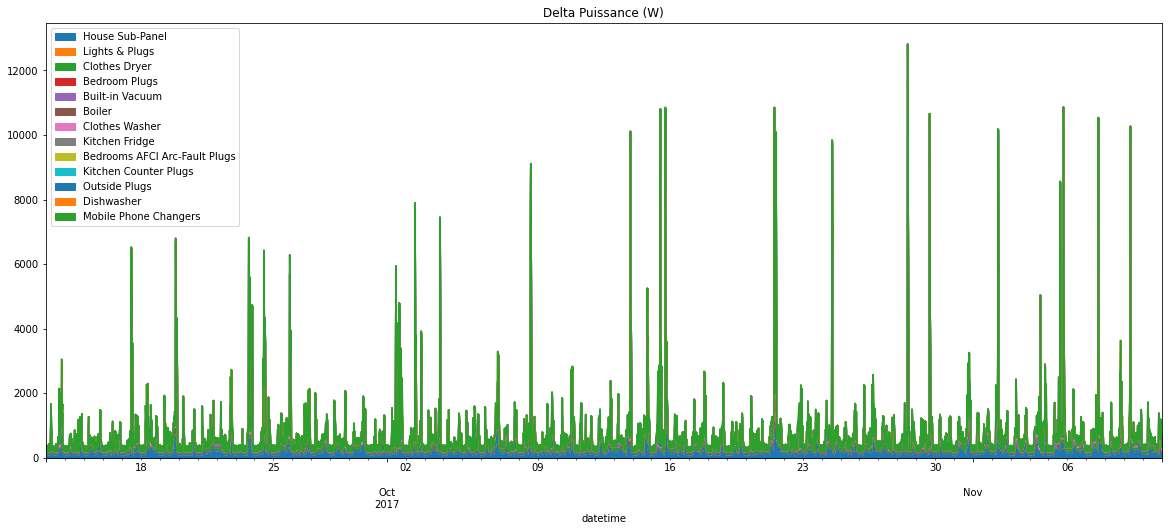

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(20,8))
#((((house2_power_blk1_norm[labels_active].abs() > tol).any(axis=1)*1).resample(rule='0.25H').mean() > 0.85)*1)['2016-02-13 08:00:00':'2016-02-14 08:00:00'].plot(label='activité 1', ax=ax);
#((((house2_power_blk1_diff.abs() > house2_power_blk1_diff.std())*1).resample(rule='1H').mean() > 0.01)*1).plot(label='activité 2', ax=ax);
house2_power_blk1.loc[:, all_groups].resample(rule='0.25H').mean().plot.area(title='Delta Puissance (W)',label='puissance', ax=ax);

ax.legend(loc='upper left');

# 2. Ajout des labels activité

Une autre approche pourrait être de considérer qu'il y a activité si certaines puissances sont supérieures à 0 (i.e. il y a bien une activité électrique sur ces équipements).

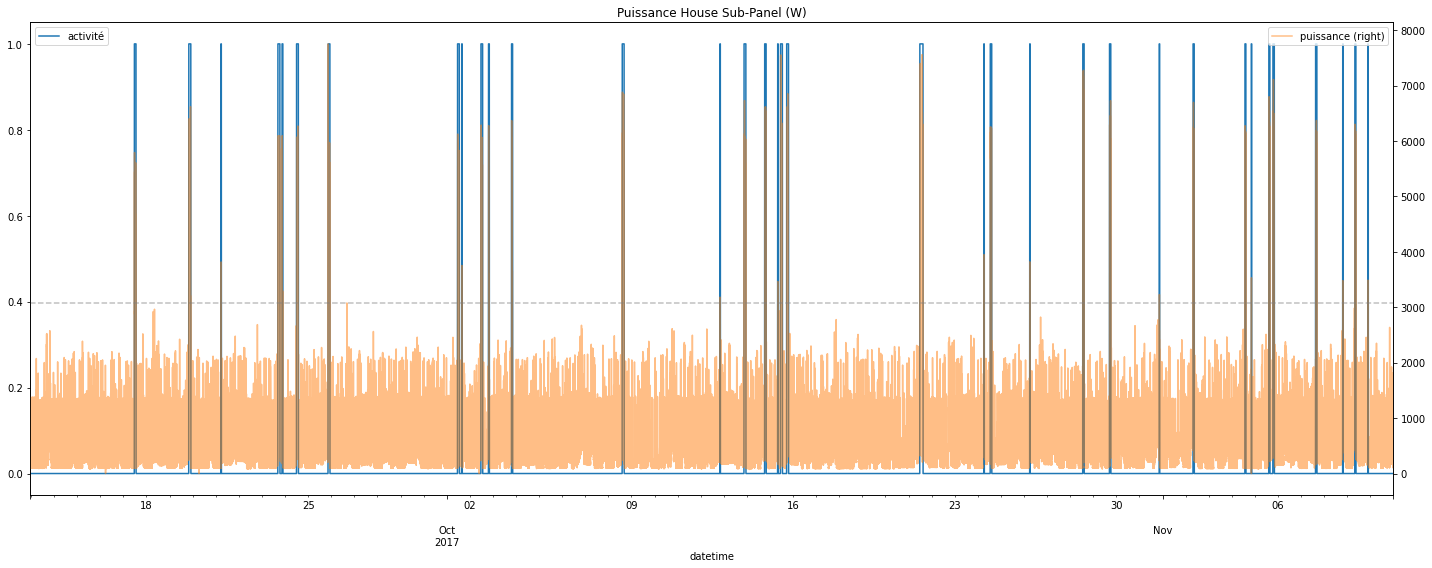

In [7]:
fig, ax = plt.subplots(1,1 , figsize=(20,8))

house2_power_blk1_resample = house2_power_blk1[all_groups].interpolate(method='linear')
tol = house2_power_blk1[all_groups].mean() + house2_power_blk1[all_groups].std() * 5

col = all_groups[0]

((((house2_power_blk1[col] > tol[col])*1).rolling('30min', center=True).mean() > 0)*1).plot(label='activité', ax=ax);
axr = house2_power_blk1_resample[col].plot(title=f'Puissance {col} (W)',secondary_y=True, label='puissance', ax=ax, alpha=0.5);
axr.axhline(y=tol[col], linestyle='dashed', color='gray', alpha=0.5);

ax.legend(loc='upper left');
axr.legend(loc='upper right');

fig.tight_layout();

Courbe déjà agrégée : à exclure.

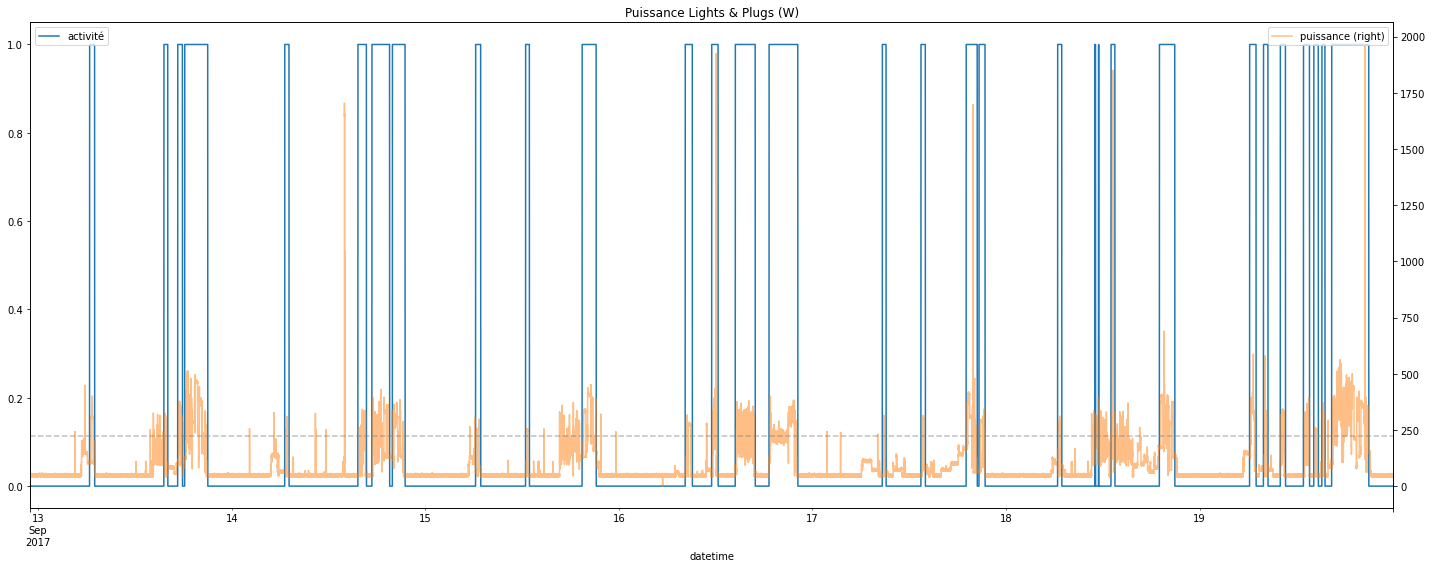

In [29]:
fig, ax = plt.subplots(1,1 , figsize=(20,8))

window = ['2017-09-12 23:00:00', '2017-09-19 23:59:59']#['2017-09-12 23:00:00', '2017-11-10 23:59:59']
tol = house2_power_blk1[all_groups].mean() + house2_power_blk1[all_groups].std() * 1.1

col = all_groups[1]

((((house2_power_blk1[col] > tol[col])*1).rolling('30min', center=True).mean() > 0.12)*1).loc[window[0]:window[1]].plot(label='activité', ax=ax);
axr = house2_power_blk1[col].loc[window[0]:window[1]].plot(title=f'Puissance {col} (W)',secondary_y=True, label='puissance', ax=ax, alpha=0.5);
axr.axhline(y=tol[col], linestyle='dashed', color='gray', alpha=0.5);

ax.legend(loc='upper left');
axr.legend(loc='upper right');

fig.tight_layout();

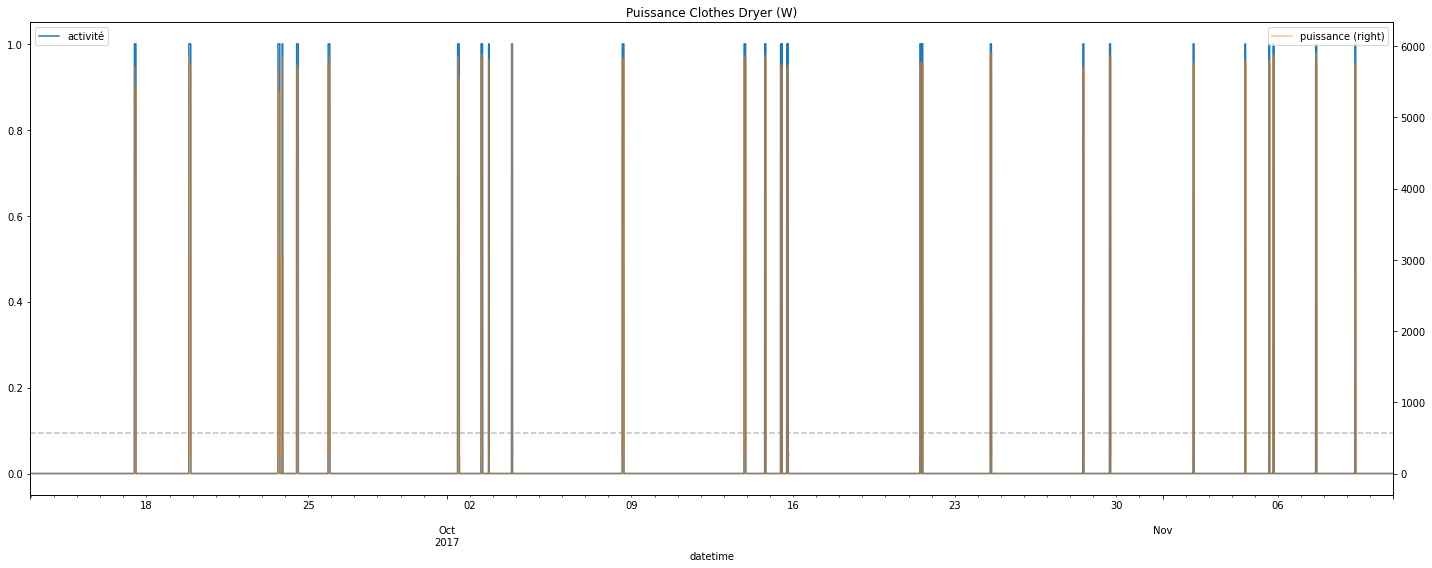

In [31]:
fig, ax = plt.subplots(1,1 , figsize=(20,8))

window = ['2017-09-12 23:00:00', '2017-11-10 23:59:59']
tol = house2_power_blk1[all_groups].mean() + house2_power_blk1[all_groups].std() * 1.1

col = all_groups[2]

((((house2_power_blk1[col] > tol[col])*1).rolling('30min', center=True).mean() > 0.12)*1).loc[window[0]:window[1]].plot(label='activité', ax=ax);
axr = house2_power_blk1[col].loc[window[0]:window[1]].plot(title=f'Puissance {col} (W)',secondary_y=True, label='puissance', ax=ax, alpha=0.5);
axr.axhline(y=tol[col], linestyle='dashed', color='gray', alpha=0.5);

ax.legend(loc='upper left');
axr.legend(loc='upper right');

fig.tight_layout();

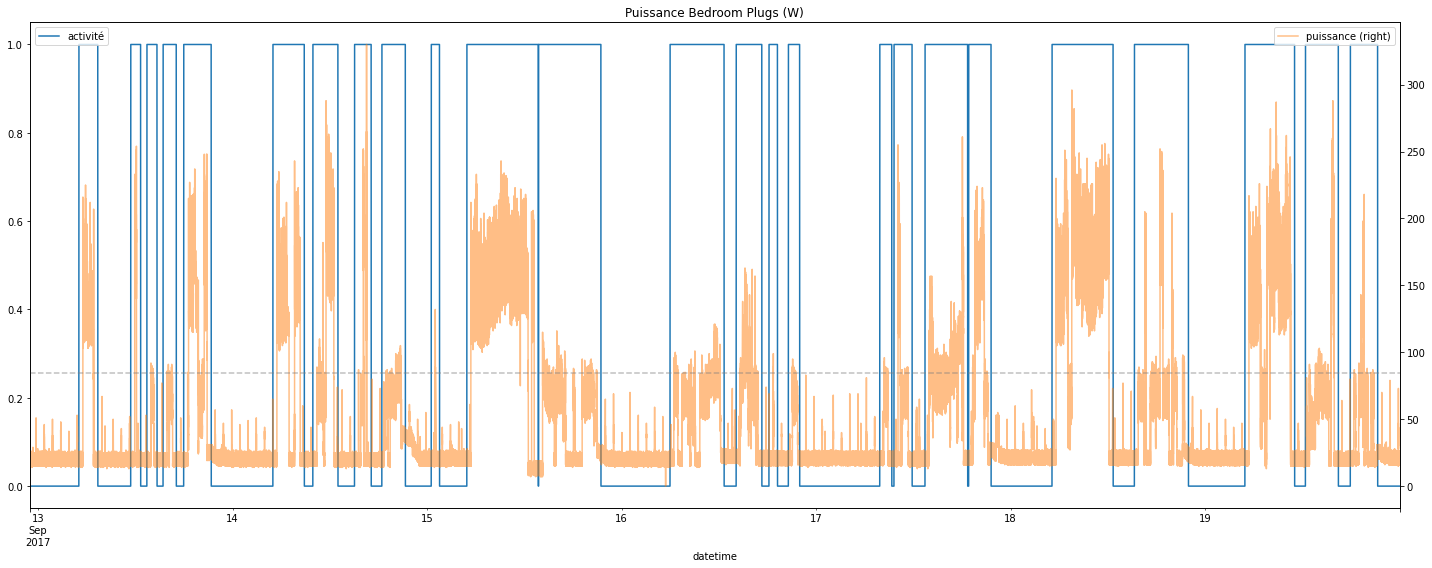

In [38]:
fig, ax = plt.subplots(1,1 , figsize=(20,8))

window = ['2017-09-12 23:00:00', '2017-09-19 23:59:59']#['2017-09-12 23:00:00', '2017-11-10 23:59:59']
tol = house2_power_blk1[all_groups].mean() + house2_power_blk1[all_groups].std() * 0.5

col = all_groups[3]

((((house2_power_blk1[col] > tol[col])*1).rolling('1h', center=True).mean() > 0)*1).loc[window[0]:window[1]].plot(label='activité', ax=ax);
axr = house2_power_blk1[col].loc[window[0]:window[1]].plot(title=f'Puissance {col} (W)',secondary_y=True, label='puissance', ax=ax, alpha=0.5);
axr.axhline(y=tol[col], linestyle='dashed', color='gray', alpha=0.5);

ax.legend(loc='upper left');
axr.legend(loc='upper right');

fig.tight_layout();

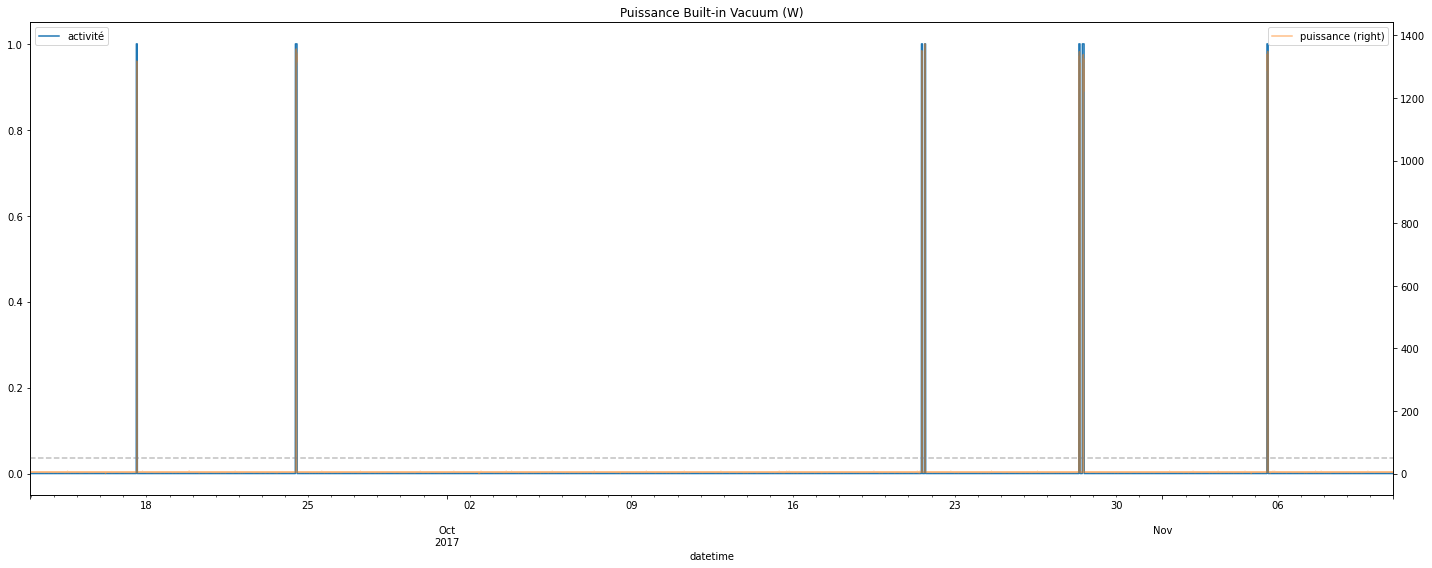

In [43]:
fig, ax = plt.subplots(1,1 , figsize=(20,8))

window = ['2017-09-12 23:00:00', '2017-11-10 23:59:59']
tol = house2_power_blk1[all_groups].mean() + house2_power_blk1[all_groups].std()

col = all_groups[4]

((((house2_power_blk1[col] > tol[col])*1).rolling('1h', center=True).mean() > 0)*1).loc[window[0]:window[1]].plot(label='activité', ax=ax);
axr = house2_power_blk1[col].loc[window[0]:window[1]].plot(title=f'Puissance {col} (W)',secondary_y=True, label='puissance', ax=ax, alpha=0.5);
axr.axhline(y=tol[col], linestyle='dashed', color='gray', alpha=0.5);

ax.legend(loc='upper left');
axr.legend(loc='upper right');

fig.tight_layout();

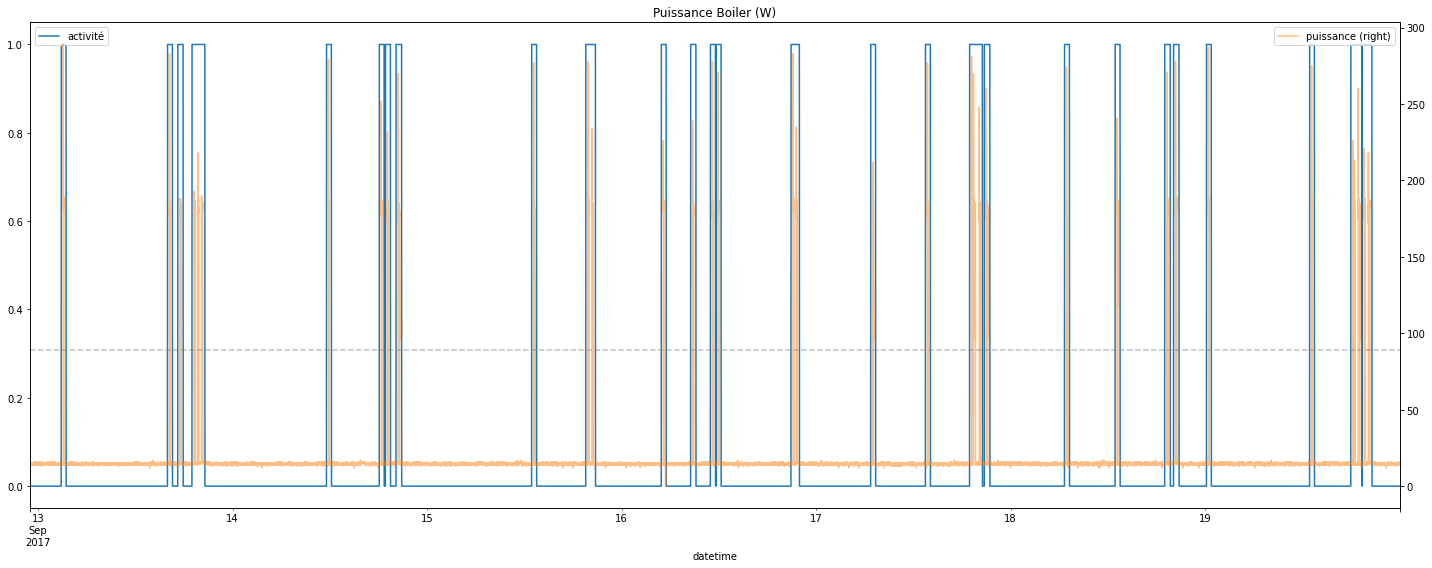

In [49]:
fig, ax = plt.subplots(1,1 , figsize=(20,8))

window = ['2017-09-12 23:00:00', '2017-09-19 23:59:59']#['2017-09-12 23:00:00', '2017-11-10 23:59:59']
tol = house2_power_blk1[all_groups].mean() + house2_power_blk1[all_groups].std()

col = all_groups[5]

((((house2_power_blk1[col] > tol[col])*1).rolling('30min', center=True).mean() > 0)*1).loc[window[0]:window[1]].plot(label='activité', ax=ax);
axr = house2_power_blk1[col].loc[window[0]:window[1]].plot(title=f'Puissance {col} (W)',secondary_y=True, label='puissance', ax=ax, alpha=0.5);
axr.axhline(y=tol[col], linestyle='dashed', color='gray', alpha=0.5);

ax.legend(loc='upper left');
axr.legend(loc='upper right');

fig.tight_layout();

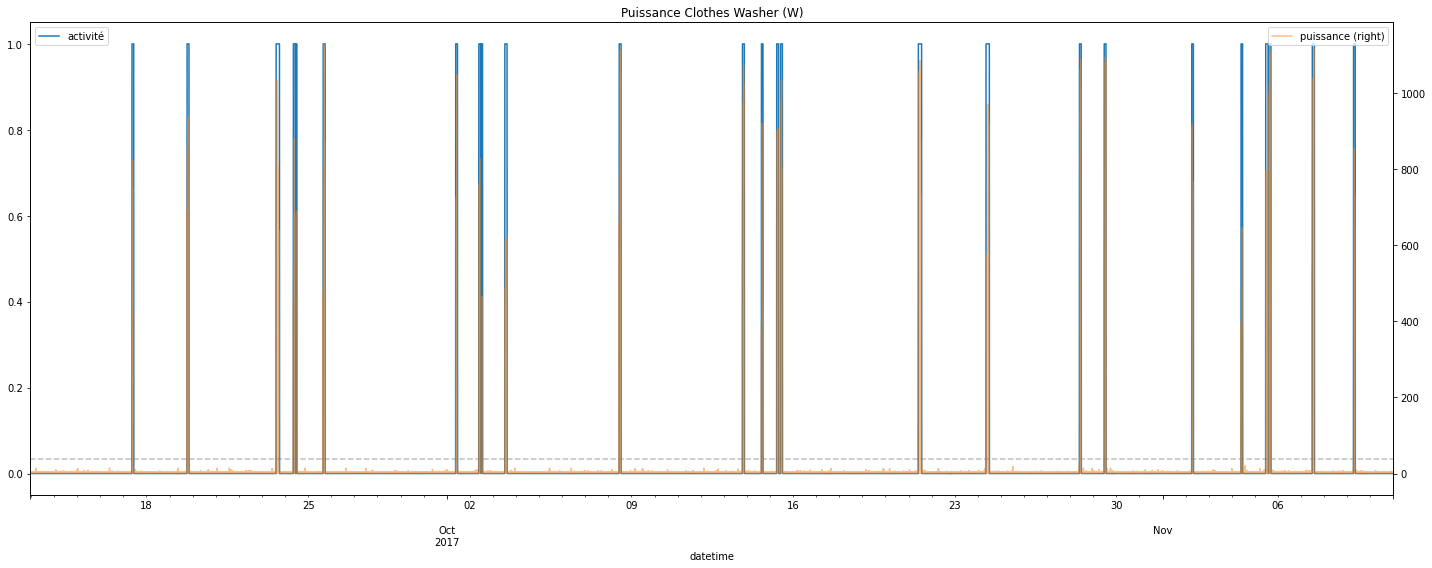

In [50]:
fig, ax = plt.subplots(1,1 , figsize=(20,8))

window = ['2017-09-12 23:00:00', '2017-09-19 23:59:59']#['2017-09-12 23:00:00', '2017-11-10 23:59:59']
tol = house2_power_blk1[all_groups].mean() + house2_power_blk1[all_groups].std()

col = all_groups[6]

((((house2_power_blk1[col] > tol[col])*1).rolling('30min', center=True).mean() > 0)*1).loc[window[0]:window[1]].plot(label='activité', ax=ax);
axr = house2_power_blk1[col].loc[window[0]:window[1]].plot(title=f'Puissance {col} (W)',secondary_y=True, label='puissance', ax=ax, alpha=0.5);
axr.axhline(y=tol[col], linestyle='dashed', color='gray', alpha=0.5);

ax.legend(loc='upper left');
axr.legend(loc='upper right');

fig.tight_layout();

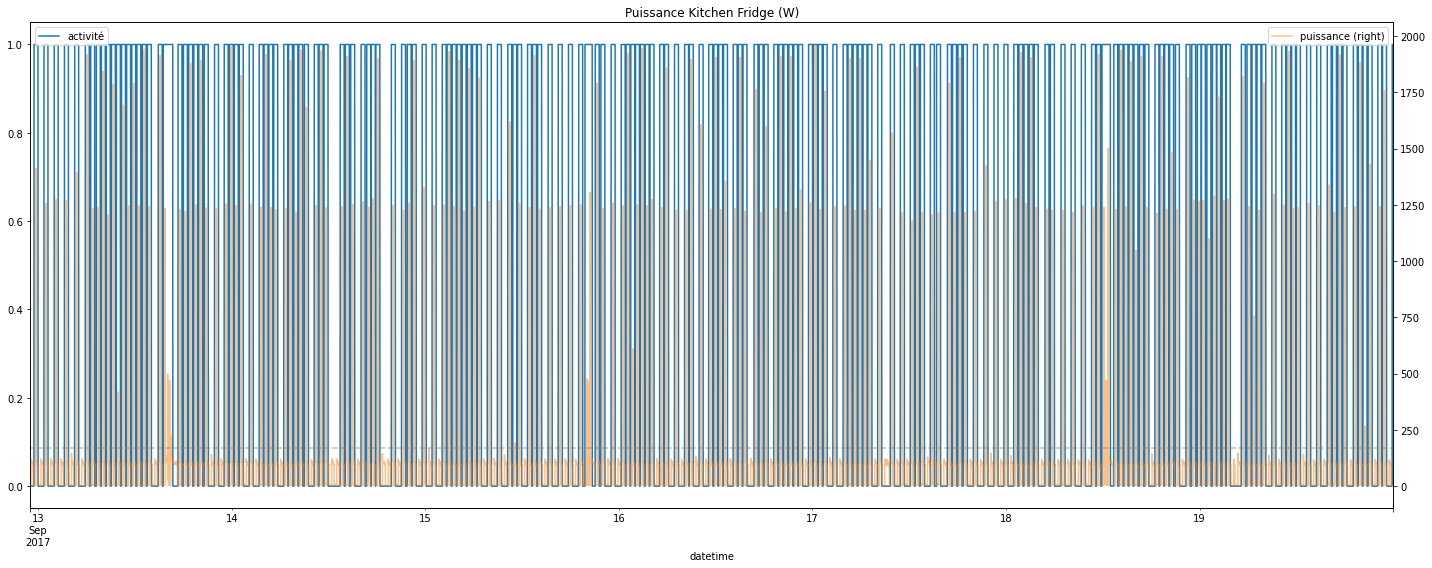

In [52]:
fig, ax = plt.subplots(1,1 , figsize=(20,8))

window = ['2017-09-12 23:00:00', '2017-09-19 23:59:59']#['2017-09-12 23:00:00', '2017-11-10 23:59:59']
tol = house2_power_blk1[all_groups].mean() + house2_power_blk1[all_groups].std() * 2

col = all_groups[7]

((((house2_power_blk1[col] > tol[col])*1).rolling('30min', center=True).mean() > 0)*1).loc[window[0]:window[1]].plot(label='activité', ax=ax);
axr = house2_power_blk1[col].loc[window[0]:window[1]].plot(title=f'Puissance {col} (W)',secondary_y=True, label='puissance', ax=ax, alpha=0.5);
axr.axhline(y=tol[col], linestyle='dashed', color='gray', alpha=0.5);

ax.legend(loc='upper left');
axr.legend(loc='upper right');

fig.tight_layout();

Le frigot ne peut être assimilé à de l'activité et sera donc à exclure.

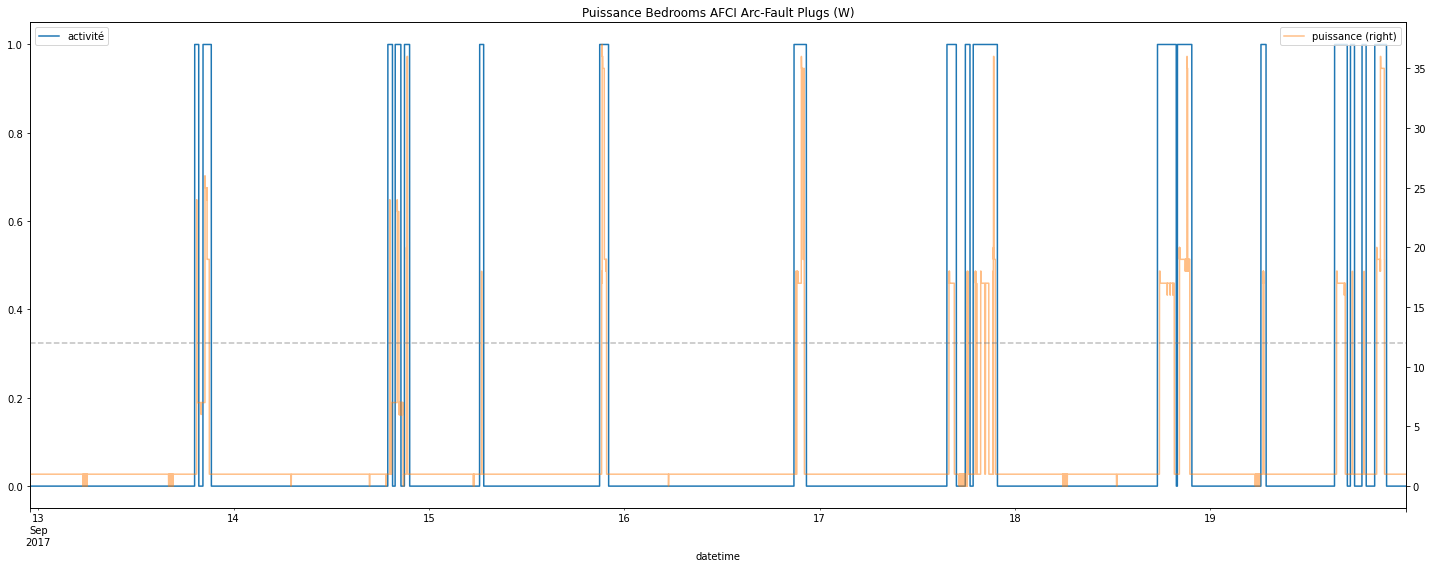

In [56]:
fig, ax = plt.subplots(1,1 , figsize=(20,8))

window = ['2017-09-12 23:00:00', '2017-09-19 23:59:59']#['2017-09-12 23:00:00', '2017-11-10 23:59:59']
tol = house2_power_blk1[all_groups].mean() + house2_power_blk1[all_groups].std() * 0.5

col = all_groups[8]

((((house2_power_blk1[col] > tol[col])*1).rolling('30min', center=True).mean() > 0)*1).loc[window[0]:window[1]].plot(label='activité', ax=ax);
axr = house2_power_blk1[col].loc[window[0]:window[1]].plot(title=f'Puissance {col} (W)',secondary_y=True, label='puissance', ax=ax, alpha=0.5);
axr.axhline(y=tol[col], linestyle='dashed', color='gray', alpha=0.5);

ax.legend(loc='upper left');
axr.legend(loc='upper right');

fig.tight_layout();

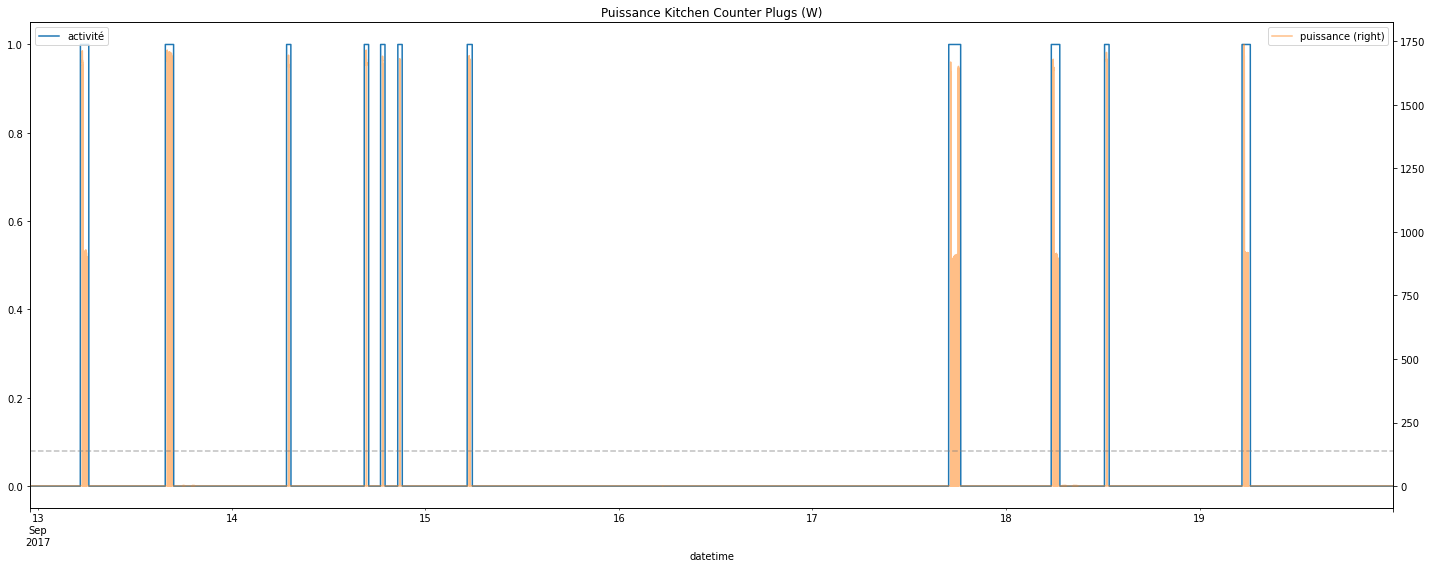

In [57]:
fig, ax = plt.subplots(1,1 , figsize=(20,8))

window = ['2017-09-12 23:00:00', '2017-09-19 23:59:59']#['2017-09-12 23:00:00', '2017-11-10 23:59:59']
tol = house2_power_blk1[all_groups].mean() + house2_power_blk1[all_groups].std()

col = all_groups[9]

((((house2_power_blk1[col] > tol[col])*1).rolling('30min', center=True).mean() > 0)*1).loc[window[0]:window[1]].plot(label='activité', ax=ax);
axr = house2_power_blk1[col].loc[window[0]:window[1]].plot(title=f'Puissance {col} (W)',secondary_y=True, label='puissance', ax=ax, alpha=0.5);
axr.axhline(y=tol[col], linestyle='dashed', color='gray', alpha=0.5);

ax.legend(loc='upper left');
axr.legend(loc='upper right');

fig.tight_layout();

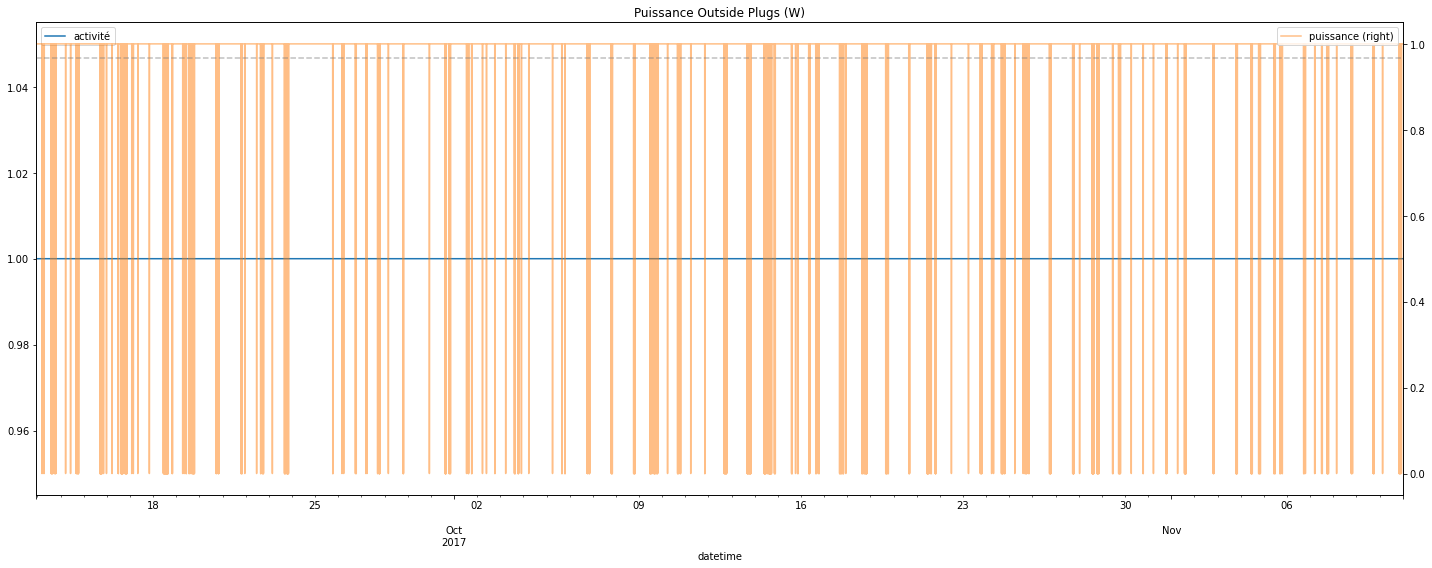

In [61]:
fig, ax = plt.subplots(1,1 , figsize=(20,8))

window = ['2017-09-12 23:00:00', '2017-11-10 23:59:59']
tol = house2_power_blk1[all_groups].mean() + house2_power_blk1[all_groups].std() * 0

col = all_groups[10]

((((house2_power_blk1[col] > tol[col])*1).rolling('30min', center=True).mean() > 0)*1).loc[window[0]:window[1]].plot(label='activité', ax=ax);
axr = house2_power_blk1[col].loc[window[0]:window[1]].plot(title=f'Puissance {col} (W)',secondary_y=True, label='puissance', ax=ax, alpha=0.5);
axr.axhline(y=tol[col], linestyle='dashed', color='gray', alpha=0.5);

ax.legend(loc='upper left');
axr.legend(loc='upper right');

fig.tight_layout();

On obsèrve de très faibles puissances et beaucoup de bruit. Nous allons exclure cette mesure.

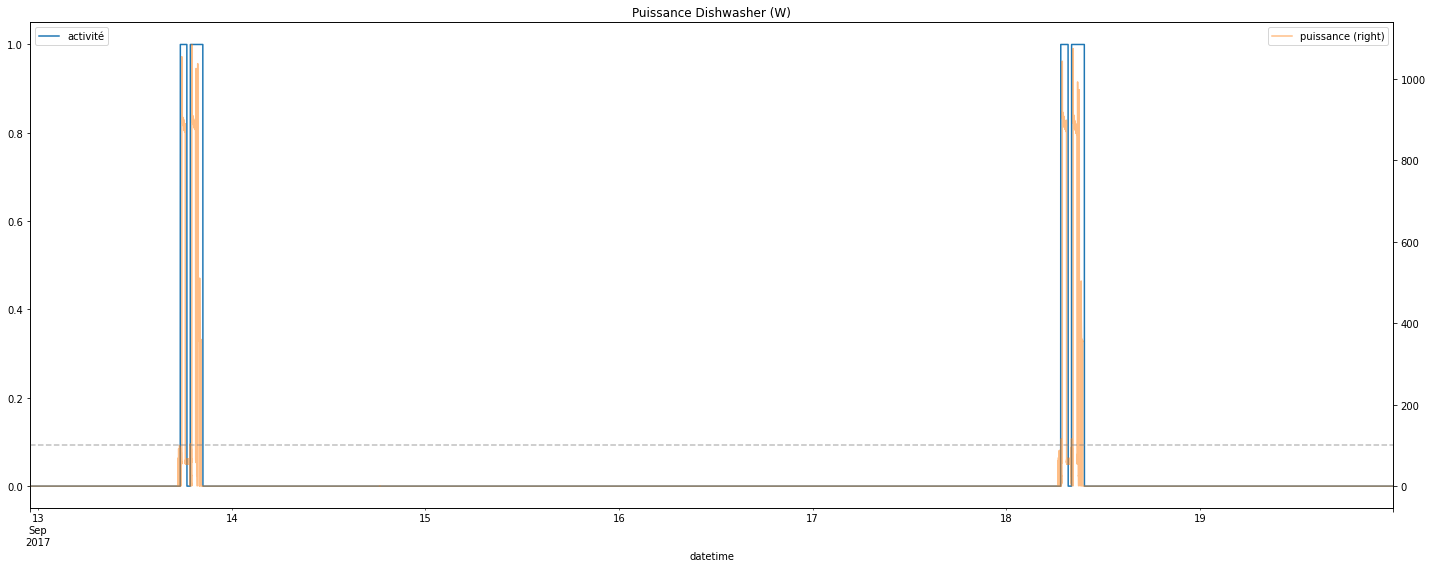

In [67]:
fig, ax = plt.subplots(1,1 , figsize=(20,8))

window = ['2017-09-12 23:00:00', '2017-09-19 23:59:59']#['2017-09-12 23:00:00', '2017-11-10 23:59:59']
tol = house2_power_blk1[all_groups].mean() + house2_power_blk1[all_groups].std()

col = all_groups[11]

((((house2_power_blk1[col] > tol[col])*1).rolling('30min', center=True).mean() > 0.1)*1).loc[window[0]:window[1]].plot(label='activité', ax=ax);
axr = house2_power_blk1[col].loc[window[0]:window[1]].plot(title=f'Puissance {col} (W)',secondary_y=True, label='puissance', ax=ax, alpha=0.5);
axr.axhline(y=tol[col], linestyle='dashed', color='gray', alpha=0.5);

ax.legend(loc='upper left');
axr.legend(loc='upper right');

fig.tight_layout();

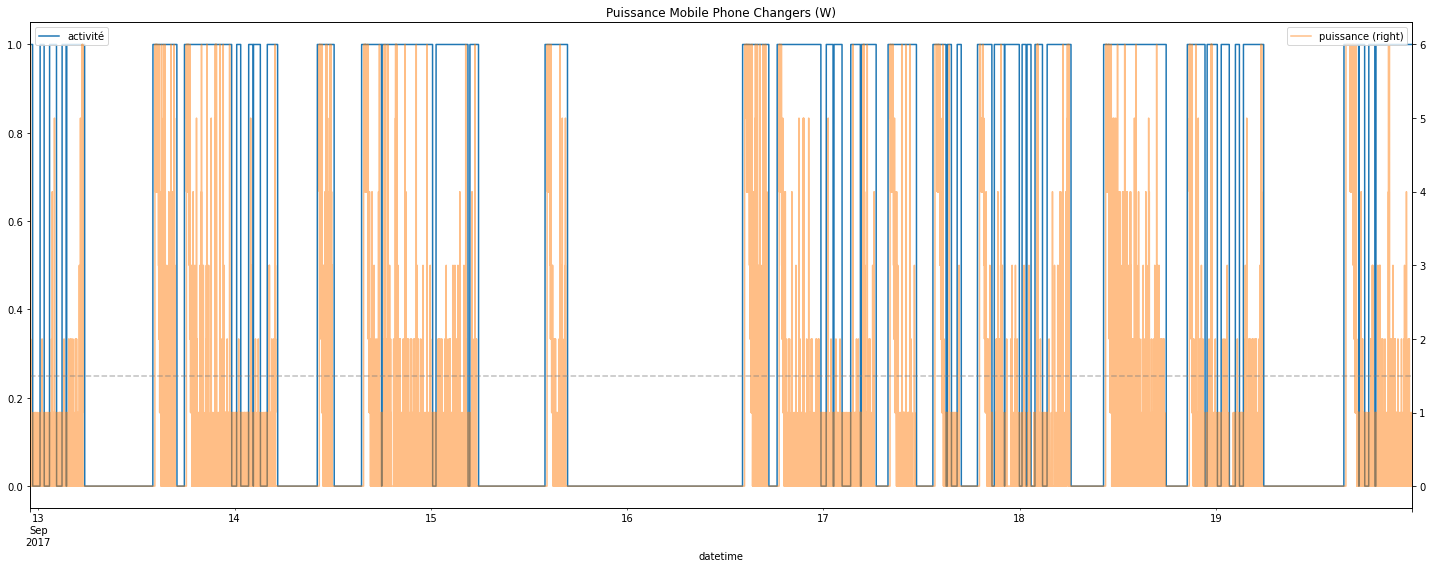

In [69]:
fig, ax = plt.subplots(1,1 , figsize=(20,8))

window = ['2017-09-12 23:00:00', '2017-09-19 23:59:59']#['2017-09-12 23:00:00', '2017-11-10 23:59:59']
tol = house2_power_blk1[all_groups].mean() + house2_power_blk1[all_groups].std() * 1.5

col = all_groups[12]

((((house2_power_blk1[col] > tol[col])*1).rolling('30min', center=True).mean() > 0)*1).loc[window[0]:window[1]].plot(label='activité', ax=ax);
axr = house2_power_blk1[col].loc[window[0]:window[1]].plot(title=f'Puissance {col} (W)',secondary_y=True, label='puissance', ax=ax, alpha=0.5);
axr.axhline(y=tol[col], linestyle='dashed', color='gray', alpha=0.5);

ax.legend(loc='upper left');
axr.legend(loc='upper right');

fig.tight_layout();

Ce signal présente de faibles puissances et sera à exclure.

Agrégation des résulats : nous allons agréger tous les résultats et tracer le graphe de l'activité vs la courbe de charge sur les appaeils correspondants à de l'activité.

In [72]:
params = pd.DataFrame(data={'tol1mul': [5, 1.1, 1.1, 0.5, 1, 1, 1, 2, 0.5, 1, 0, 1, 1.5],
                            'rolling': ['30min', '30min', '30min', '1h', '1h', '30min', '30min', '30min', '30min', '30min', '30min', '30min', '30min'],
                            'tol2': [0, 0.12, 0.12, 0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0]})

In [78]:
#house1_power_blk2['activity'] = pd.Series(data=np.zeros(len(house1_power_blk2)), index=house1_power_blk2.index, dtype=np.int8)
house2_activity_blk1 = pd.DataFrame()

for i, group in enumerate(all_groups):
    #if not h1_labels.loc[h1_labels['group'] == all_groups[i], 'activity'].any():
    #    continue

    house2_activity_blk1[group] = ((((house2_power_blk1[group] > house2_power_blk1[group].mean() + house2_power_blk1[group].std() * params.loc[i, 'tol1mul'])*1).rolling(params.loc[i, 'rolling'], center=True).mean() > params.loc[i, 'tol2'])*1)


house2_power_blk1['activity'] = (house2_activity_blk1[labels_active].any(axis=1))*1

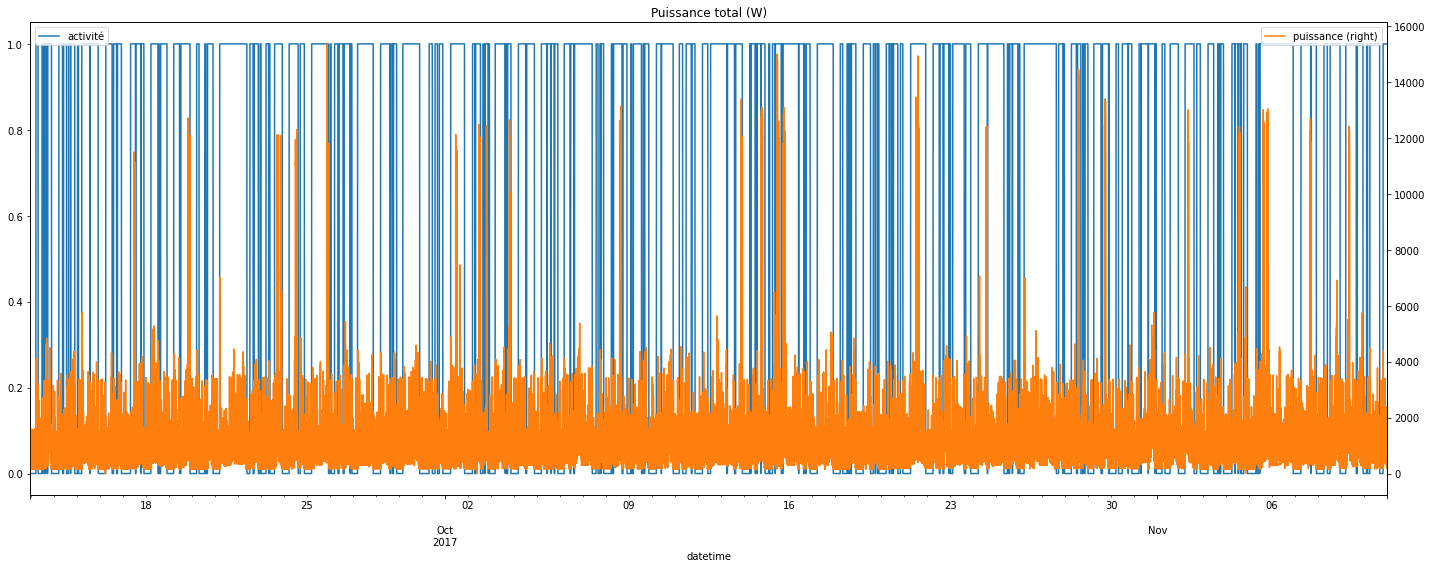

In [74]:
fig, ax = plt.subplots(1,1 , figsize=(20,8))

house2_power_blk1['activity'].plot(label='activité', ax=ax);
axr = house2_power_blk1[labels_active].sum(axis=1).plot(title=f'Puissance total (W)',secondary_y=True, label='puissance', ax=ax);

ax.legend(loc='upper left');
axr.legend(loc='upper right');

fig.tight_layout();

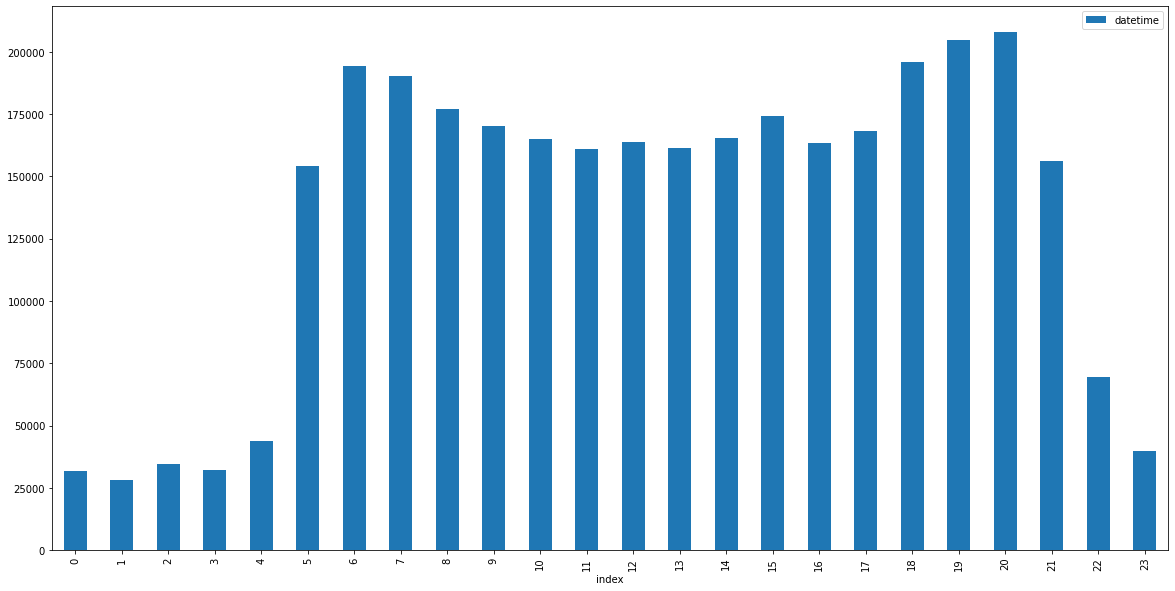

In [79]:
pd.DataFrame(house2_power_blk1[house2_power_blk1['activity'] > 0].index.hour.value_counts()).reset_index(drop=False).sort_values(by='index').plot.bar(x='index', y='datetime', figsize=(20,10), legend='Histogramme activité=f(heure)');


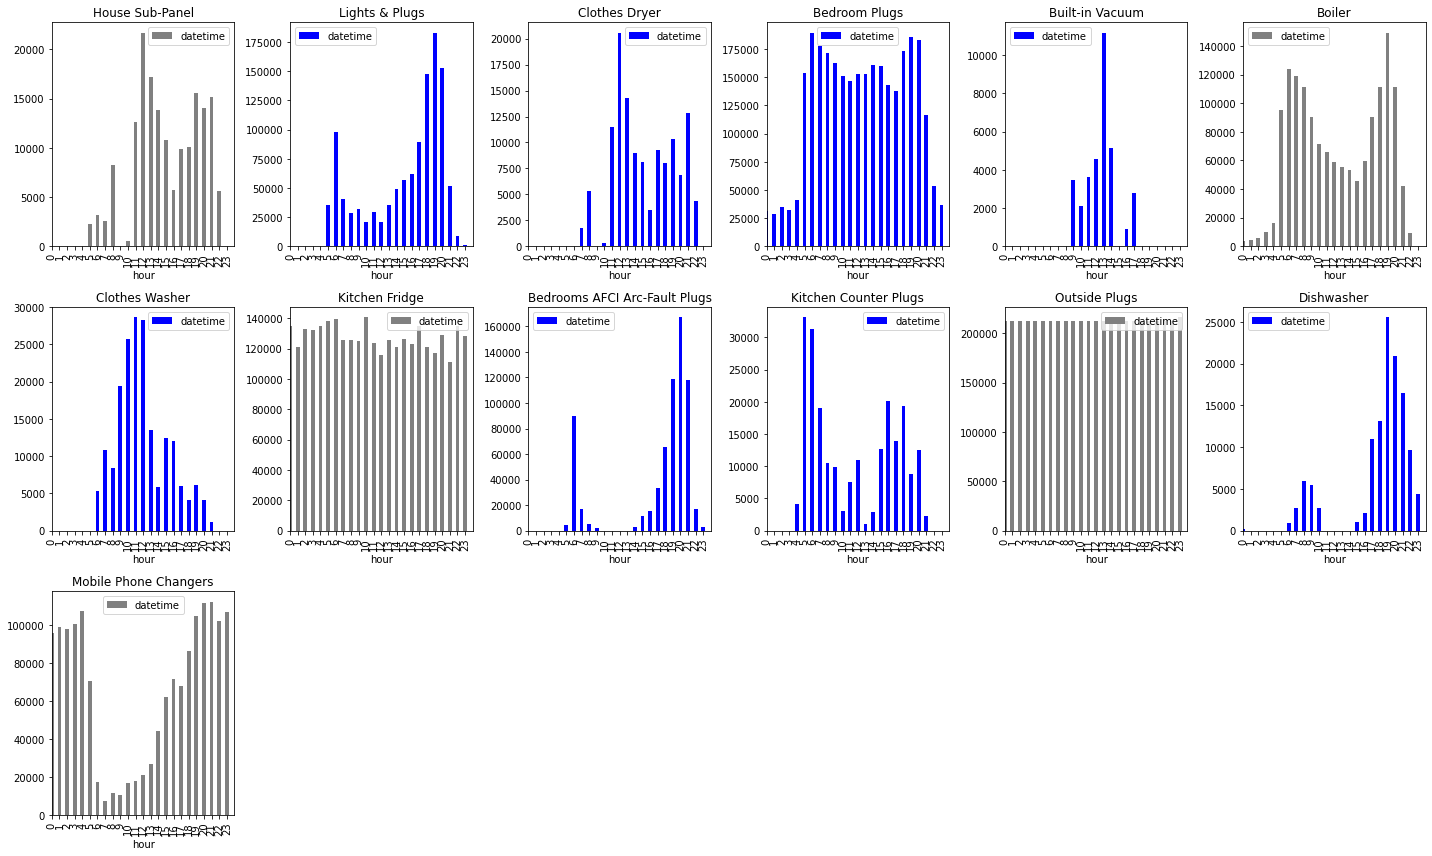

In [80]:
# we prepare our plot
fig = plt.figure(figsize=(20, 12));

# for each column
for k, col in enumerate(all_groups):
    # we add a subplot
    ax = fig.add_subplot(3, 6, k+1)

    pd.DataFrame(house2_activity_blk1[house2_activity_blk1[col] > 0].index.hour.value_counts(), index=range(24)).reset_index(drop=False).sort_values(by='index').plot.bar(x='index', y='datetime', color='blue' if col in labels_active else 'grey', ax=ax);
    ax.set_xlim(0, 24)
    #pd.DataFrame(house1_activity_blk2[house1_activity_blk2[col] > 0].index.hour).reset_index(drop=False).sort_values(by='index').plot(kind='hist', width=0.7, x='index', y='datetime', color='blue' if col in labels_active else 'grey', bins=range(24), ax=ax);
    
    
    ax.set_xlabel('hour')
    ax.set_title(col)

plt.tight_layout()
plt.show();